# Libs

In [19]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import seaborn as sns

# hw1

In [ ]:
# Метод опорных векторов реализован в классе sklearn.svm.SVC.
# Основными параметрами этого класса являются коэффициент С и тип ядра kernel. 
# В данной задаче мы будем использовать линейное ядро — для этого нужно задать значение параметра kernel='linear'

# Индексы опорных объектов обученного классификатора хранятся в поле support_

# Инструкция по выполнению
# Загрузите выборку из файла svm-data.csv. В нем записана двумерная выборка (целевая переменная указана в первом столбце, 
# признаки — во втором и третьем).
# Обучите классификатор с линейным ядром, параметром C = 100000 и random_state=241. 
# Такое значение параметра нужно использовать, чтобы убедиться, что SVM работает с выборкой как с линейно разделимой. 
# При более низких значениях параметра алгоритм будет настраиваться с учетом слагаемого в функционале, 
# штрафующего за маленькие отступы, из-за чего результат может не совпасть с решением классической задачи 
# SVM для линейно разделимой выборки.

# Найдите номера объектов, которые являются опорными (нумерация с единицы). 
# Они будут являться ответом на задание. Обратите внимание, что в качестве ответа нужно привести номера объектов 
# в возрастающем порядке через запятую или пробел. Нумерация начинается с 1.

In [2]:
data = pd.read_csv('svm-data.csv', header=None)

In [25]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
svc_model = SVC(C=100000, kernel='linear', random_state=241)
svc_model.fit(X, y)
y_pred = svc_model.predict(X)
svc_model.support_+1

array([ 4,  5, 10])

<Axes: xlabel='1', ylabel='2'>

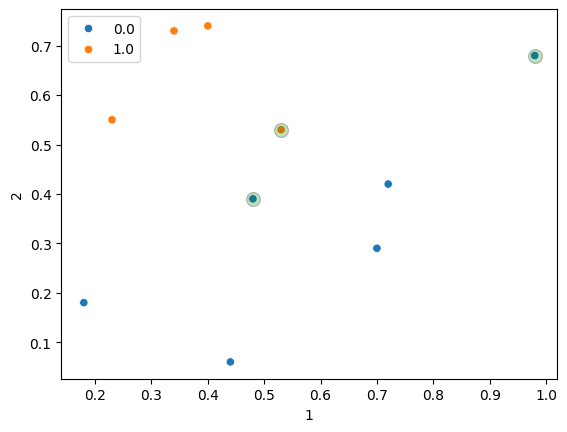

In [32]:
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y)
sns.scatterplot(x=X.iloc[svc_model.support_, 0], y=X.iloc[svc_model.support_, 1], 
                color='green', s=100, alpha=0.25, ec='black')

# hw2

In [ ]:
# Загрузите объекты из новостного датасета 20 newsgroups, относящиеся к категориям "космос" и "атеизм" 
# (инструкция приведена выше). Обратите внимание, что загрузка данных может занять несколько минут

# Вычислите TF-IDF-признаки для всех текстов. Обратите внимание, что в этом задании мы предлагаем вам вычислить 
# TF-IDF по всем данным. При таком подходе получается, что признаки на обучающем множестве используют информацию 
# из тестовой выборки — но такая ситуация вполне законна, поскольку мы не используем значения целевой переменной из теста. 
# На практике нередко встречаются ситуации, когда признаки объектов тестовой выборки известны на момент обучения, 
# и поэтому можно ими пользоваться при обучении алгоритма.

# Подберите минимальный лучший параметр C из множества [10^-5, 10^-4, ... 10^4, 10^5] для SVM с линейным ядром 
# (kernel='linear') при помощи кросс-валидации по 5 блокам. Укажите параметр random_state=241 и для SVM, 
# и для KFold. В качестве меры качества используйте долю верных ответов (accuracy).

# Обучите SVM по всей выборке с оптимальным параметром C, найденным на предыдущем шаге.

# Найдите 10 слов с наибольшим абсолютным значением веса (веса хранятся в поле coef_ у svm.SVC). 
# Они являются ответом на это задание. Укажите эти слова через запятую или пробел, в нижнем регистре, 
# в лексикографическом порядке.

In [46]:
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer

newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )

In [65]:
X = newsgroups.data
y = newsgroups.target

In [86]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)
X_tfidf.shape

(1786, 28382)

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC

In [93]:
grid = {'C': np.power(10.0, np.arange(-5, 6))}
cv = KFold(n_splits=5, shuffle=True, random_state=241)
clf = SVC(kernel='linear', random_state=241)
gs = GridSearchCV(clf, grid, scoring='accuracy', cv=cv)
gs.fit(X_tfidf, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             estimator=SVC(kernel='linear', random_state=241),
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05])},
             scoring='accuracy')

In [158]:
cv_results = gs.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(mean_score, params)

0.5526360264776301 {'C': 1e-05}
0.5526360264776301 {'C': 0.0001}
0.5526360264776301 {'C': 0.001}
0.5526360264776301 {'C': 0.01}
0.9501635290987904 {'C': 0.1}
0.9932804406678872 {'C': 1.0}
0.9932804406678872 {'C': 10.0}
0.9932804406678872 {'C': 100.0}
0.9932804406678872 {'C': 1000.0}
0.9932804406678872 {'C': 10000.0}
0.9932804406678872 {'C': 100000.0}


In [159]:
clf = SVC(C = 1, kernel='linear', random_state=241)
clf.fit(X_tfidf, y)

SVC(C=1, kernel='linear', random_state=241)

In [118]:
for i in clf.coef_:
    print(type(i))

<class 'scipy.sparse._csr.csr_matrix'>


In [160]:
X_tfidf.shape

(1786, 28382)

In [129]:
# Найдите 10 слов с наибольшим абсолютным значением веса (веса хранятся в поле coef_ у svm.SVC). 
# Они являются ответом на это задание. Укажите эти слова через запятую или пробел, в нижнем регистре, 
# в лексикографическом порядке.

In [161]:
from scipy.sparse import csr_matrix

dense_array = clf.coef_.toarray()
df = pd.DataFrame(dense_array).T
df[0] = df[0].apply(lambda x: abs(x))
result = df.sort_values(by=0, ascending=False).head(10).reset_index()
result

,index,0
0,24019,2.663165
1,12871,1.920379
2,5088,1.254690
3,5093,1.249180
4,17802,1.201611
5,23673,1.180132
6,21850,1.139081
7,5776,1.130612
8,15606,1.097094
9,22936,1.029307


In [163]:
feature_mapping = vectorizer.get_feature_names_out()
final_lst = []
for i in result['index']:
    final_lst.append(feature_mapping[i])
final_lst_v2 = sorted(final_lst)
print(final_lst_v2)

['atheism', 'atheists', 'bible', 'god', 'keith', 'moon', 'religion', 'sci', 'sky', 'space']


# hw3

In [ ]:
# Загрузите данные из файла data-logistic.csv. Это двумерная выборка, целевая переменная на которой принимает значения -1 или 1.

# Убедитесь, что выше выписаны правильные формулы для градиентного спуска. 
# Обратите внимание, что мы используем полноценный градиентный спуск, а не его стохастический вариант!

# Реализуйте градиентный спуск для обычной и L2-регуляризованной (с коэффициентом регуляризации 10) 
# логистической регрессии. Используйте длину шага k=0.1. В качестве начального приближения используйте вектор (0, 0).

# Запустите градиентный спуск и доведите до сходимости (евклидово расстояние между векторами весов на 
# соседних итерациях должно быть не больше 1e-5). Рекомендуется ограничить сверху число итераций десятью тысячами.

# Какое значение принимает AUC-ROC на обучении без регуляризации и при ее использовании? 
# Эти величины будут ответом на задание. В качестве ответа приведите два числа через пробел. 
# Обратите внимание, что на вход функции roc_auc_score нужно подавать оценки вероятностей, 
# подсчитанные обученным алгоритмом. Для этого воспользуйтесь сигмоидной функцией: a(x) = 1 / (1 + exp(-w1 x1 - w2 x2)). 

# Попробуйте поменять длину шага. Будет ли сходиться алгоритм, если делать более длинные шаги? 
# Как меняется число итераций при уменьшении длины шага?

# Попробуйте менять начальное приближение. Влияет ли оно на что-нибудь?

In [165]:
data = pd.read_csv('data-logistic.csv', header=None)
data

,0,1,2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750
...,...,...,...
200,1,4.245176,3.053931
201,1,2.437935,1.357804
202,-1,-1.876638,1.533398
203,1,-6.824446,-13.934211


In [ ]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function for logistic regression
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(X @ weights)
    epsilon = 1e-5  # to avoid log(0)
    cost = (1/m) * ((-y).T @ np.log(h + epsilon) - (1 - y).T @ np.log(1 - h + epsilon))
    return cost

# Gradient descent for logistic regression
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        h = sigmoid(X @ weights)
        gradient = (1/m) * X.T @ (h - y)
        weights = weights - learning_rate * gradient
        cost_history[i] = compute_cost(X, y, weights)
    
    return weights, cost_history

# Example usage
if __name__ == "__main__":
    # Assuming X_train is your input features matrix with shape (m, n)
    # and y_train is your target variable (m, 1)
    # Add intercept term to X_train
    m, n = X_train.shape
    X_train = np.hstack((np.ones((m, 1)), X_train))
    weights = np.zeros((n + 1, 1))
    
    # Hyperparameters
    learning_rate = 0.01
    iterations = 1000
    
    # Train the model
    weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)
    
    # Print the final weights
    print("Final weights:", weights)

In [172]:
X[2]

0      -0.138526
1       2.468025
2       0.749425
3       1.899836
4       2.407750
         ...    
200     3.053931
201     1.357804
202     1.533398
203   -13.934211
204     0.865147
Name: 2, Length: 205, dtype: float64

In [169]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
    
data = pd.read_csv('data-logistic.csv', index_col=False, header=None )
        
y = data.iloc[:,0]
X = data.iloc[:,1:]
w1 = 0   # Вес 1
w2 = 0   # Вес 2
L1  = 0  #
len_y = len(y)
    
def gradient_spysk(w1, w2, c):
    k = 0.1 # Длинна Шага
    L = 0   #
    i = 0
    w1 = w1 - k*c*w1
    w2 = w2 - k*c*w2
    while (i < len_y):
            npexp=np.exp( -y[i] * (w1 * X[1][i] + w2 * X[2][i]) )
            summa = 1 - 1 / (1 + npexp)
            w1 = w1 + k / len_y * y[i]*X[1][i] * summa
            w2 = w2 + k / len_y * y[i]*X[2][i] * summa
            L = L + (np.log(1 + npexp))
            i = i + 1
    return L, w1, w2

def logistic_reqression(c):
    L    = 0.0
    w1   = 0.0 # Вес 1
    w2   = 0.0 # Вес 2
    w1_p = 0.0 # Вес old
    w2_p = 0.0 # Вес old
    i = 0
    # Рекомендуется ограничить сверху число итераций десятью тысячами.
    while ( i < 10000 ):
        L, w1, w2 = gradient_spysk(w1, w2, c)
        # евклидово расстояние между векторами
        evk = np.sqrt( pow((w1_p - w1),2) + pow((w2_p - w2),2) )
        # print ( i, ' evklid distance: %0.8f' % evk )
        if ( evk < 0.00001 ):
            break
        w1_p = np.copy(w1)
        w2_p = np.copy(w2)
        i = i + 1
    return L, w1, w2

def auc_roc(w1, w2):
    i = 0
    a = []
    while (i < len_y):
        a.append( 1 / (1 + np.exp( - w1*X[1][i] - w2*X[2][i])) )
        i = i + 1
    return roc_auc_score(y, a)

# Какое значение принимает AUC-ROC на обучении без регуляризации и при ее использовании? 
# Эти величины будут ответом на задание. В качестве ответа приведите два числа через пробел. 
# Обратите внимание, что на вход функции roc_auc_score нужно подавать оценки вероятностей, 
# подсчитанные обученным алгоритмом. Для этого воспользуйтесь сигмоидной функцией: a(x) = 1 / (1 + exp(-w1 x1 - w2 x2)). 

L1, L1_w1, L1_w2 = logistic_reqression(0)
print ('Обычная регрессия C=0 L1: ', L1);

L2, L2_w1, L2_w2 = logistic_reqression(10)
print ('L2-регуляризованной (с коэффициентом регуляризации 10) L2: ', L2);

L1_rez = auc_roc(L1_w1, L1_w2)
print ('AUS-ROC L1: ', round(L1_rez,3))

L2_rez = auc_roc(L2_w1, L2_w2)
print ('AUS-ROC L2: ', round(L2_rez,3))

Обычная регрессия C=0 L1:  131.2861240438028
L2-регуляризованной (с коэффициентом регуляризации 10) L2:  140.31030080822228
AUS-ROC L1:  0.926
AUS-ROC L2:  0.936


# hw4

In [ ]:
# Если ответом является нецелое число, то целую и дробную часть необходимо разграничивать точкой, например, 0.42. 
# При необходимости округляйте дробную часть до двух знаков.

In [180]:
# Загрузите файл classification.csv. В нем записаны истинные классы объектов выборки (колонка true) и 
# ответы некоторого классификатора (колонка pred).
# Заполните таблицу ошибок классификации:
# Для этого подсчитайте величины TP, FP, FN и TN согласно их определениям. 
# Например, FP — это количество объектов, имеющих класс 0, но отнесенных алгоритмом к классу 1. 
# Ответ в данном вопросе — четыре числа через пробел.

classification = pd.read_csv('classification.csv')
classification
tp = classification[(classification['true'] == 1) & (classification['pred'] == 1)].shape[0]
fp = classification[(classification['true'] == 0) & (classification['pred'] == 1)].shape[0]
fn = classification[(classification['true'] == 1) & (classification['pred'] == 0)].shape[0]
tn = classification[(classification['true'] == 0) & (classification['pred'] == 0)].shape[0]
print(tp, fp, fn, tn)

43 34 59 64


In [187]:
# 3. Посчитайте основные метрики качества классификатора:
# Accuracy (доля верно угаданных) — sklearn.metrics.accuracy_score
# Precision (точность) — sklearn.metrics.precision_score
# Recall (полнота) — sklearn.metrics.recall_score
# F-мера — sklearn.metrics.f1_score
# В качестве ответа укажите эти четыре числа через пробел.

from sklearn.metrics import accuracy_score as acc_sc
from sklearn.metrics import precision_score as prec_sc
from sklearn.metrics import recall_score as rec_sc
from sklearn.metrics import f1_score as f1_sc

print(
    round(acc_sc(classification['true'], classification['pred']),2),
    round(prec_sc(classification['true'], classification['pred']),2),
    round(rec_sc(classification['true'], classification['pred']),2),
    round(f1_sc(classification['true'], classification['pred']),2)
)

0.54 0.56 0.42 0.48


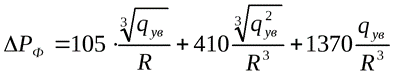

In [203]:
q1 = 3000
q2 = 250
R = 100
def func(q):
    return round(((105*(q**(1/3)/R)) + 410*((q**(2/3)/R**3)) + 1370*(q/R**3)),0)*100
func(q1), func(q2)

(1900.0, 700.0)

In [190]:
# 4. Имеется четыре обученных классификатора. В файле scores.csv записаны истинные классы и значения степени 
# принадлежности положительному классу для каждого классификатора на некоторой выборке:
# для логистической регрессии — вероятность положительного класса (колонка score_logreg),
# для SVM — отступ от разделяющей поверхности (колонка score_svm),
# для метрического алгоритма — взвешенная сумма классов соседей (колонка score_knn),
# для решающего дерева — доля положительных объектов в листе (колонка score_tree).
# Загрузите этот файл.
# 5. Посчитайте площадь под ROC-кривой для каждого классификатора. Какой классификатор имеет наибольшее 
# значение метрики AUC-ROC (укажите название столбца)? Воспользуйтесь функцией sklearn.metrics.roc_auc_score.

scores = pd.read_csv('scores.csv')
scores

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263
...,...,...,...,...,...
195,0,0.573801,-0.088203,0.284192,0.400000
196,0,0.624422,-0.012315,0.205437,0.400000
197,1,0.425538,-0.135673,0.382351,0.700000
198,0,0.905270,0.583806,1.000000,1.000000


$$ [ \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}} ]

In [209]:
from sklearn.metrics import roc_auc_score as roc
roc_logreg = roc(scores['true'], scores['score_logreg']).round(2)
roc_svm = roc(scores['true'], scores['score_svm']).round(2)
roc_knn = roc(scores['true'], scores['score_knn']).round(2)
roc_tree = roc(scores['true'], scores['score_tree']).round(2)
print(roc_logreg, roc_svm, roc_knn, roc_tree)

0.72 0.71 0.64 0.69


In [ ]:
# 6. Какой классификатор достигает наибольшей точности (Precision) при полноте (Recall) не менее 70% ? 
# Чтобы получить ответ на этот вопрос, найдите все точки precision-recall-кривой с помощью функции 
# sklearn.metrics.precision_recall_curve. Она возвращает три массива: precision, recall, thresholds. 
# В них записаны точность и полнота при определенных порогах, указанных в массиве thresholds. 
# Найдите максимальной значение точности среди тех записей, для которых полнота не меньше, чем 0.7.

In [226]:
from sklearn.metrics import precision_recall_curve as prc
prc_logreg = prc(scores['true'], scores['score_logreg'])
prc_logreg_df = pd.DataFrame(zip(prc_logreg[0],prc_logreg[1], prc_logreg[2]), columns=['precision', 'recall', 'thresholds'])
prc_logreg_df['ml'] = 'logreg'

prc_svm = prc(scores['true'], scores['score_svm'])
prc_svm_df = pd.DataFrame(zip(prc_svm[0],prc_svm[1], prc_svm[2]), columns=['precision', 'recall', 'thresholds'])
prc_svm_df['ml'] = 'svm'

prc_knn = prc(scores['true'], scores['score_knn'])
prc_knn_df = pd.DataFrame(zip(prc_knn[0],prc_knn[1], prc_knn[2]), columns=['precision', 'recall', 'thresholds'])
prc_knn_df['ml'] = 'knn'

prc_tree = prc(scores['true'], scores['score_tree'])
prc_tree_df = pd.DataFrame(zip(prc_tree[0],prc_tree[1], prc_tree[2]), columns=['precision', 'recall', 'thresholds'])
prc_tree_df['ml'] = 'tree'

prc_df = pd.concat([prc_logreg_df, prc_svm_df, prc_knn_df, prc_tree_df])

In [229]:
prc_df[prc_df['recall'] >= 0.7].groupby('ml').max().sort_values(by='precision', ascending=False).round(2)

,precision,recall,thresholds
ml,,,
tree,0.65,1.0,0.40
logreg,0.63,1.0,0.50
svm,0.62,1.0,-0.11
knn,0.61,1.0,0.36
